In [ ]:
import pandas as pd
import seaborn as sns

# do not display the number with scientific notation and set precision to 2 decimals digits
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.set_option('display.max_rows', 100)
pd.set_option("display.max_colwidth", 50)

In [ ]:
# import Sherwan's cleaned versions of files

# orderlines_cl.csv
url = 'https://raw.githubusercontent.com/sherwan-m/Eniac_Analyze_Discounts/main/orderlines_cleaned.csv' 
orderlines = pd.read_csv(url)

# orders_cl.csv
url = 'https://raw.githubusercontent.com/sherwan-m/Eniac_Analyze_Discounts/main/orders_cleaned.csv' 
orders = pd.read_csv(url)

# brands_cl.csv
url = 'https://raw.githubusercontent.com/icaromisquita/archives/main/brands.csv' 
brands = pd.read_csv(url)

# products_cl.csv
url = 'https://raw.githubusercontent.com/sherwan-m/Eniac_Analyze_Discounts/main/products_cleaned.csv' 
products = pd.read_csv(url)

Transform to date format the columns from orders and orderlines:

In [ ]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

Products missing values

In [ ]:
products[products['type'].isna()] #In this cleaned data we don't have missing values

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price


In the previous data, the one provided by WBS we have some missing values and most of them were Iphones. So the following code will replace the missing values with a code **9999** for Iphones.

In [ ]:
products["type"].fillna(9999, inplace = True)
products.sample(10)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price
1214,1214,FCM0041,Mac memory DIMM DDR3 2GB 1333MHz FCM,2GB RAM Mac Pro (July 2010).,13.99,1,1364,13.99,13.99
6987,6987,OTT0182,OtterBox iPhone Case Symmetry 8/7 Fucsia,Symmetry OtterBox protective sleeve one-piece ...,22.99,0,11865403,24.99,24.99
4194,4194,WDT0366,"4TB WD My Passport External Hard Disk 25 ""USB ...",4TB External Hard Drive USB 3.0 with Mac and P...,136.995,1,11935397,169.00,169.00
6947,6947,PRY0012,Prynt Pocket Portable Printer iPhone Green,Portable Printer for iPhone,146.99,1,11905404,154.99,154.99
6033,6033,TRA0012-A,Open - Kit Transcend JetDrive expansion SSD 50...,Refurbished expansion kit 480GB SSD for MacBoo...,3.415.845,1,12215397,355.50,355.50
2952,2952,PAC1418,Synology DS716 + II Pack | 8GB RAM | WD 16TB N...,Synology DS716 + II with 8GB of RAM memory + 1...,11.141.789,0,12175397,1276.99,1276.99
4467,4467,GRT0406-A,Open - Griffin Survivor Summit Resistant Case ...,Rigid housing with protective screen and clip ...,299.899,0,1298,29.99,29.99
280,280,TRI0012,Star Wars Chewbacca Tribe 8GB USB 2.0 Pen Drive,PenDrive 8GB USB 2.0 + 1GB online edition Star...,152.799,0,11935397,19.99,19.99
3566,3566,APP1661,Apple iPhone 6s Plus 32GB Rose Gold,New iPhone 6S Plus 32GB Free.,6.259.996,0,24811716,770.33,770.33
4079,4079,SYN0132-A,Open - Synology RT1900AC Wifi Router AC 1900,ac Wifi Wireless Router with Synology SRM inte...,1.359.895,0,1298,160.88,160.88


##Exploring the Type columns in products dataset, to observe some troubling values.

Observing the type series, some non numeric values were observed. 

In [ ]:
products["type"].unique()

array(['8696', '13855401', '1387', '1230', '1364', '1325', '1334',
       '13005399', '13835403', '12995397', '11865403', '13955395', '1276',
       '11905404', '12635403', '12755395', '12355400', '1229', '11935397',
       '12655397', '1404', '101781405', '12085400', '1282', '12175397',
       '1424', '9094', '1405', '14305406', '10142', '12645406', '10230',
       '12215397', '14365395', '5384', '1,44E+11', '57445397', '5395',
       '13555403', '21485407', '20642062', '1,46E+11', '1280', '12575403',
       '1216', '14035403', '1433', '1515', '5720', '1298', '12585395',
       '1392', '1231', '5398', '1296', '5,49E+11', '13615399', '1375',
       '5405', '42931714', '12141714', '12285400', '42945397', '15435404',
       '21535407', '1416', '2,17E+11', '11821715', '24215399', '11434',
       '2425', '2434', '2449', '13621714', '24861714', '0', '24821716',
       '5,74E+15', '54864259', '4259', '51861714', '1714', '51601716',
       '51871714', '5403', '54085407', '5407', '5406', '5404

In the series, some nonnumeric values were observed: like 5,49E+11, 1,02E+12. 

*   Substituting the comma( , ) for a dot( . ) may solve the issues.

In [ ]:
products["type"] = products["type"].replace(to_replace=",",value="." , regex=True)
products.sample(10)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price
3116,3116,PAC1449,My Cloud EX2 Ultra Pack | WD 4TB Network,WD My Cloud EX2 Ultra + 4TB (2x2TB) Network WD...,3.001.792,0,11935397,342.18,342.18
5202,5202,MUV0155-A,"Open - Muvit Armband Universal Fino 4-47 ""Blac...",sporty and comfortable armband for iPhone 5 / ...,115.524,0,1298,12.61,12.61
2930,2930,PAC1419,Synology DS916 + Pack | 2GB RAM | Seagate 8TB ...,Synology DS916 + with 2GB RAM memory + 8TB (4x...,905.368,0,12175397,926.37,926.37
6738,6738,PAC2218,Synology DS718 + NAS Server | 16GB RAM | 8TB (...,Scalable NAS server with transcoding 4K: 4-cor...,9.031.791,0,12175397,912.18,912.18
1619,1619,BEL0184,Belkin Folio Case Classic iPhone 6 / 6S Blue,protective case with microfiber interior for i...,89.903,0,11865403,8.99,8.99
1384,1384,GRT0370,Griffin AirStrap 360 black sheath iPad Air 2,Protective Case with Hand Strap for iPad.,298.991,1,12635403,29.90,29.90
7046,7046,DLL0058,"Dell UltraSharp Monitor U3818DW 37.5 ""WQHD Cur...",Dell 37.5-inch monitor with minimalist design ...,11.499.888,1,1296,1199.99,1199.99
5736,5736,APP2096,Apple iPhone Silicone Case Cover 8 Plus / 7 Pl...,Ultrathin silicone case and microfiber premium...,389.995,0,11865403,45.00,45.00
1903,1903,PAC1165,Pack DS216SE + 12TB Synology WD Red,Synology Pack DS216SE + 12TB (2x6TB) Synology ...,5.151.793,1,12175397,633.99,633.99
4017,4017,APP1825,"Apple MacBook Pro 13 ""Core i7 24GHz | 8GB RAM ...",MacBook Pro 13 inch i7 to 24GHz with 8GB RAM a...,21.055.936,0,2158,2234.99,2234.99


Finally converting products["type"] to numeric

In [ ]:
products["type"] = pd.to_numeric(products["type"])
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7829 non-null   int64  
 1   sku          7829 non-null   object 
 2   name         7829 non-null   object 
 3   desc         7829 non-null   object 
 4   promo_price  7829 non-null   object 
 5   in_stock     7829 non-null   int64  
 6   type         7829 non-null   float64
 7   max_price    7829 non-null   float64
 8   price        7829 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 550.6+ KB


###Finding a pattern in the Type column, to create a new category column.

In [ ]:
(
products
    .assign(new_type = ((products['type']).astype(float)%10000).astype(int))
    .loc[lambda df_ : df_['new_type'] == 2062]
    #.groupby('new_type')
    #.count()
    .head(60)
)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type
236,236,SEV0007,RAM installation service MacBook / Pro,Installation of RAM in your MacBook / Pro.,199.892,0,20642062.00,19.99,19.99,2062
237,237,SEV0012,HDD or SSD installation service MacBook / Pro,HDD or SSD installation on your MacBook / Pro ...,499.851,0,20642062.00,49.99,49.99,2062
238,238,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,599.918,0,20642062.00,59.99,59.99,2062
239,239,SEV0018,IMac RAM installation service,Installation of RAM in your iMac.,199.892,0,20642062.00,19.99,19.99,2062
240,240,SEV0019,Installation Service Mac mini RAM,RAM installed in your Mac mini.,199.892,0,20642062.00,19.99,19.99,2062
241,241,SEV0020,Installation Service Mac Pro RAM,Installation of RAM in your Mac Pro.,199.892,0,20642062.00,19.99,19.99,2062
242,242,SEV0021,SSD installation service MacBook Pro Retina,Installing SSD in your MacBook Pro Retina + Da...,499.851,0,20642062.00,1967.61,1967.61,2062
243,243,SEV0022,MacBook Air SSD installation service,SSD installation on your MacBook Air + Data Tr...,499.851,0,20642062.00,49.99,49.99,2062
244,244,SEV0023,HDD or SSD installation service Mac Pro,HDD or SSD installation on your Mac Pro + Data...,499.851,0,20642062.00,49.99,49.99,2062
245,245,SEV0024,Service installation RAM + HDD + SSD Mac mini,installation RAM HDD + SSD + on your Mac mini ...,599.918,0,20642062.00,59.99,59.99,2062


Deep exploring new_type = 0


In [ ]:
(
products
    .assign(new_type = ((products['type']).astype(float)%10000).astype(int))
    .loc[lambda df_ : df_['new_type'] == 0]
    #.groupby('new_type')
    #.count()
    #.apply(lambda x: 'Match' if x == 'Bill' else 'Mismatch')
    .head(60)
)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type
123,123,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for i...,499.899,0,144000000000.00,49.99,49.99,0
124,124,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,29.99,0,144000000000.00,39.99,39.99,0
125,125,REP0050,Headset calls iPhone 4 Repair,Repair service including parts and labor for i...,399.893,0,144000000000.00,39.99,39.99,0
131,131,REP0060,iPhone 4s battery repair,It is including parts and labor for iPhone 4s,29.99,0,144000000000.00,39.99,39.99,0
132,132,REP0068,Headset calls iPhone 4s repair,Repair service including parts and labor for i...,399.893,0,144000000000.00,49.90,49.90,0
134,134,REP0073,Repair Touch Screen iPad (1st generation),Repair service including parts and labor for iPad,999.896,0,144000000000.00,99.99,99.99,0
135,135,REP0074,LCD screen repair iPad (1st generation),Repair service including parts and labor for iPad,1.149.899,0,144000000000.00,115.99,115.99,0
136,136,REP0080,repair battery cases (1st generation),Battery Repair Service includes parts and labo...,699.899,0,144000000000.00,84.00,84.00,0
137,137,REP0081,Connector repair charge cases (1st generation),Repair service including parts and labor for iPad,79.99,0,144000000000.00,79.90,79.90,0
138,138,REP0084,iPad 2 LCD screen repair,Repair service including parts and labor for i...,1.299.899,0,144000000000.00,129.99,129.99,0


In [ ]:
products = products.assign(new_type = ((products['type']).astype(float)%10000).astype(int))
#products.loc[products['sku'].str.contains("REP|SEV") & products['new_type'] == 0, 'type'] = 2062  #Services
#products.loc[products['sku'].str.contains("MOP|MOB") & products['new_type'] == 0, 'type'] = 230   #Acessory
#products.loc[products['sku'].str.contains("APP") & products['new_type'] == 0, 'type'] = 1282      #MAC
#products.info()

After defining wich category is included in the type number, we can pass a dictionary to create a new column with the category 

In [ ]:
Acessory = [230,1216,1230,1231,1280,1296,1375,1387,1392,1424,1515,2425,4259,5384,8696,5720,5406,5404,5403,5399,5398,5397,5395,5385,2434,2449,1416,2434,2449]
Storage = [1276,1364,1404,1433]
Services=[2062]
Replacement_Parts=[142,5401,5407]
Network_Products = [1325,1334]
Security=[1859,9094]
IPHONE = [1716]
Apple_Watch = [5185,5405,2282]
MAC = [1282,2158]
IPAD_IPOD = [1405,1714,1715]

Passing the dictionary to the new_type column

In [ ]:
category = {
  0:"Services",
  142:"Replacement Parts", #Battery/Replacement/Repair
  230:"Acessory",
 1216:"Acessory",
 1229:"Acessory",
 1230:"Acessory",
 1231:"Acessory", #Extended Warranty
 1276:"Storage",
 1280:"Acessory",
 1282:"MAC",
 1296:"Acessory",
 1298:"Refurbished",
 1325:"Network Products",
 1334:"Network Products", 
 1364:"Storage", #RAM memory
 1375:"Acessory",
 1387:"Acessory",
 1392:"Acessory",
 1404:"Acessory", #RAM memory
 1405:"IPAD_IPOD",
 1416:"Acessory", #Software
 1424:"Acessory",
 1433:"Storage",
 1434:"Acessory",
 1515:"Acessory",
 1714:"IPAD_IPOD",
 1715:"IPAD_IPOD",
 1716:"IPHONE",
 1859:"Security",
 2062:"Services",
 2158:"MAC",
 2282:"Apple Watch",
 2425:"Acessory",
 2434:"Acessory", #Apple Watch Acessory
 2449:"Acessory", #Apple Watch Acessory
 4259:"Acessory",
 5185:"Apple Watch",
 5384:"Acessory",
 5385:"Acessory",
 5395:"Acessory",
 5397:"Storage",
 5398:"Acessory",
 5399:"Acessory",
 5400:"Acessory",
 5401:"Replacement_Parts", #Replacement Parts
 5403:"Acessory",
 5404:"Acessory",
 5405:"Apple Watch",
 5406:"Acessory",
 5407:"Replacement_Parts", #Battery
 5720:"Acessory",
 8696:"Acessory",
 9094:"Security",
 9999:"IPHONE" #Created By replacing the missing values
}

In [ ]:
products['category']= products['new_type'].map(category)
products.head(50)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type,category
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,499.899,1,8696.00,54.99,54.99,8696,Acessory
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,589.996,0,13855401.00,60.49,60.49,5401,Replacement_Parts
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,569.898,0,1387.00,59.00,59.00,1387,Acessory
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,229.997,0,1230.00,25.00,25.00,1230,Acessory
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,31.99,1,1364.00,35.71,35.71,1364,Storage
5,5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,420.003,0,1230.00,45.00,45.00,1230,Acessory
6,6,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,274.694,0,1364.00,36.99,36.99,1364,Storage
7,7,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,669.904,0,1364.00,76.99,76.99,1364,Storage
8,8,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,330.003,0,1325.00,35.00,35.00,1325,Network Products
9,9,APP0101,Apple Mini DisplayPort to DVI Adapter,Adapter mini DisplayPort to DVI MacBook and Ma...,330.003,0,1325.00,35.00,35.00,1325,Network Products


## Kayla's Graph's Notebook

In [ ]:
#Group by brands to see which have the most products
orderlines['brand_sku']= orderlines['sku'].str[0:3]
# Change 'date' to datetime format
orderlines.date = pd.to_datetime(orderlines.date)

temp = (
orderlines
      .groupby('brand_sku')
      .agg({'product_quantity' : 'sum', 'unit_price': 'sum'})
      .sort_values('product_quantity')
      .copy()
)

In [ ]:
temp_with_brands = temp.merge(brands, left_on='brand_sku', right_on='short')
temp_with_brands = temp_with_brands.rename(columns={'unit_price':'total sales'})
temp_with_brands

,product_quantity,total sales,short,long
0,2,99.98,PQI,Pqi
1,2,17.89,OPU,Opulus
2,3,191.33,COG,Cogito
3,3,41.97,MTF,Mistify
4,3,92.67,RET,Retrak Utopia
...,...,...,...,...
179,8872,447104.17,SAT,Satechi
180,10290,1126469.86,WDT,Western Digital
181,12268,1505834.14,OWC,OWC
182,15543,24918879.20,PAC,Pack


## Orders Relating to Time

In [ ]:
orders = orders.query('state == "Completed"')

In [ ]:
# Converting 'created_date' to datetime type and making and 'month' column

orders['created_date'] = pd.to_datetime(orders['created_date'])
orders['month'] = orders['created_date'].dt.strftime('%b')
# Only using 2017 since it includes all months
year_filtered = orders[orders['created_date'].dt.strftime('%Y')=='2017'].copy()


month_plot =(
year_filtered 
        .groupby('month')
        .agg({'total_paid' : 'sum'})
        .sort_values('total_paid')
        .reset_index()
)

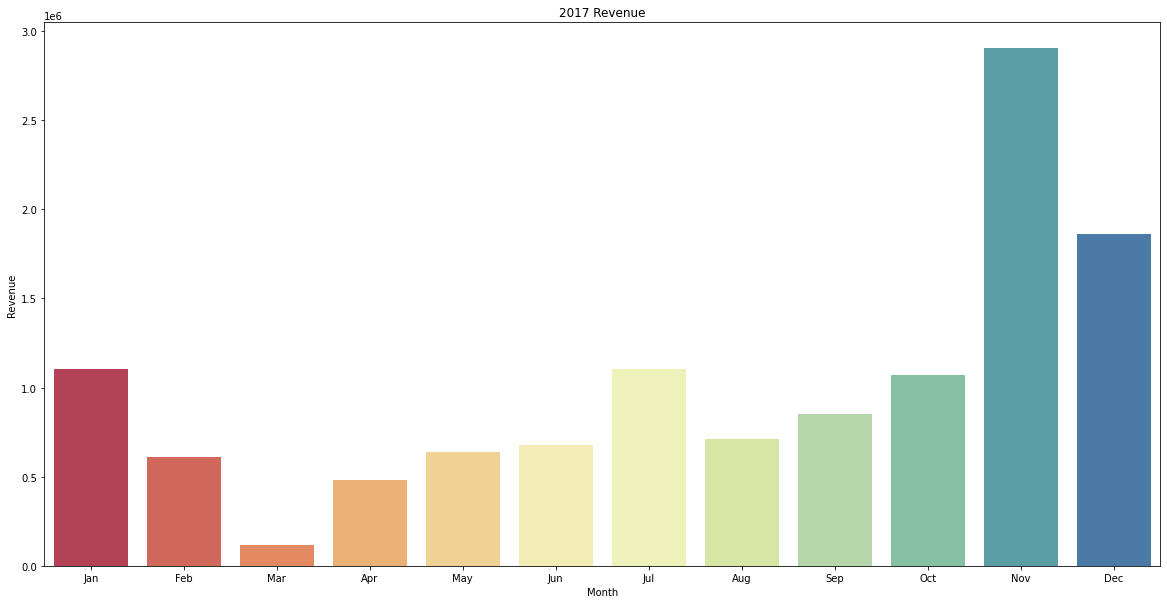

In [ ]:
# Plotting the df
plt.subplots(figsize=(20, 10))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    data=month_plot,
    x='month',
    y='total_paid',
    order=months,
    palette='Spectral',
  
)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('2017 Revenue')
plt.show()

Observing the graph the 2 months where the revenue were higher: November and December. Maybe because of the Holidays or other special days?

#Important Dates

**November** = Black Friday

**December** = Christmas

**January 7th** = Winter sales begin

**July 1st** = Summer sales begin

**End of September/ Beginning of October** = New iPhone releases

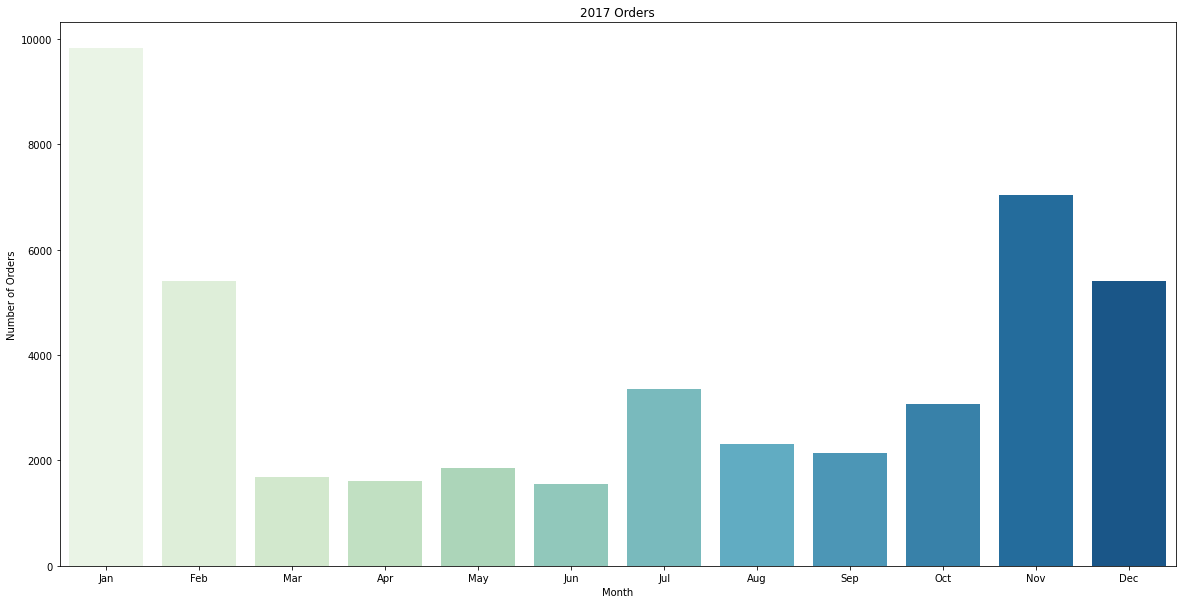

In [ ]:
# plotting the number of orders in 2017

orders_bar = (
orders
      .groupby('month')['state']
      .count()
      .reset_index()
)

plt.subplots(figsize=(20, 10))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    data=orders_bar,
    x='month',
    y='state',
    order=months,
    palette='GnBu',
  
)

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('2017 Orders')
plt.show()

# Discounts

In [ ]:
# filtering only completed orders using 'orders'
orderlines = orderlines.loc[orderlines['id_order'].isin(orders['order_id'])]

#merging orderlines and products 

ol_products = orderlines.merge(products, on='sku')

ol_products.head()

,Unnamed: 0_x,id_order,product_id,product_quantity,sku,date,unit_price,brand_sku,Unnamed: 0_y,name,desc,promo_price,in_stock,type,max_price,price,new_type,category
0,7,299545,0,1,OWC0100,2017-01-01 01:46:16,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory
1,558,299404,0,1,OWC0100,2017-01-01 22:50:39,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory
2,1199,300650,0,1,OWC0100,2017-01-02 15:31:09,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory
3,1324,300760,0,1,OWC0100,2017-01-02 17:20:31,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory
4,2562,301975,0,1,OWC0100,2017-01-03 20:04:54,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory


In [ ]:
# creating total price column
ol_products['total_price'] = ol_products['unit_price'] * ol_products['product_quantity']

In [ ]:
ol_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59972 entries, 0 to 59971
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0_x      59972 non-null  int64         
 1   id_order          59972 non-null  int64         
 2   product_id        59972 non-null  int64         
 3   product_quantity  59972 non-null  int64         
 4   sku               59972 non-null  object        
 5   date              59972 non-null  datetime64[ns]
 6   unit_price        59972 non-null  float64       
 7   brand_sku         59972 non-null  object        
 8   Unnamed: 0_y      59972 non-null  int64         
 9   name              59972 non-null  object        
 10  desc              59972 non-null  object        
 11  promo_price       59972 non-null  object        
 12  in_stock          59972 non-null  int64         
 13  type              59972 non-null  float64       
 14  max_price         5997

In [ ]:
#creating discount percentage column
ol_products['discount_percentage'] = round(((ol_products['price'] - ol_products['unit_price']) / ol_products['price']) * 100, 2)
ol_products = ol_products.dropna(subset=['price'])
#dropping extra columns
#ol_products = ol_products.drop(columns=['product_id'])

In [ ]:
ol_products.head(20)

,Unnamed: 0_x,id_order,product_id,product_quantity,sku,date,unit_price,brand_sku,Unnamed: 0_y,name,desc,promo_price,in_stock,type,max_price,price,new_type,category,total_price,discount_percentage
0,7,299545,0,1,OWC0100,2017-01-01 01:46:16,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,47.49,26.52
1,558,299404,0,1,OWC0100,2017-01-01 22:50:39,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,47.49,26.52
2,1199,300650,0,1,OWC0100,2017-01-02 15:31:09,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
3,1324,300760,0,1,OWC0100,2017-01-02 17:20:31,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
4,2562,301975,0,1,OWC0100,2017-01-03 20:04:54,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
5,3022,302293,0,5,OWC0100,2017-01-04 09:32:44,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,249.95,22.65
6,4381,303599,0,1,OWC0100,2017-01-06 13:20:43,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
7,5565,296253,0,1,OWC0100,2017-01-08 12:11:12,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
8,6662,305687,0,1,OWC0100,2017-01-09 13:18:35,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65
9,9159,307908,0,1,OWC0100,2017-01-12 12:23:49,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65


In [ ]:
def filter_percentage(percentage):
    if percentage <= 0:
        return 'no discount'
    if percentage < 10:
        return 'up to 10'
    if percentage < 20:
        return '10-20'
    if percentage < 30:
        return '20-30'
    if percentage < 40:
        return '30-40'
    else:
        return 'other'
#applying the filter function to 'discount_percentage' column 
ol_products['discount_category'] = ol_products['discount_percentage'].apply(filter_percentage)

In [ ]:
ol_products.head()

,Unnamed: 0_x,id_order,product_id,product_quantity,sku,date,unit_price,brand_sku,Unnamed: 0_y,name,...,promo_price,in_stock,type,max_price,price,new_type,category,total_price,discount_percentage,discount_category
0,7,299545,0,1,OWC0100,2017-01-01 01:46:16,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,47.49,26.52,20-30
1,558,299404,0,1,OWC0100,2017-01-01 22:50:39,47.49,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,47.49,26.52,20-30
2,1199,300650,0,1,OWC0100,2017-01-02 15:31:09,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65,20-30
3,1324,300760,0,1,OWC0100,2017-01-02 17:20:31,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65,20-30
4,2562,301975,0,1,OWC0100,2017-01-03 20:04:54,49.99,OWC,487,OWC In-line Digital Temperature Sensor Kit HDD...,...,499.899,1,12755395.00,64.63,64.63,5395,Acessory,49.99,22.65,20-30


In [ ]:
ol_products_bar =(
ol_products
      .groupby('discount_category')
      .agg({'total_price' : 'sum'})
      .sort_values('total_price')
      .reset_index()
)
ol_products_bar

,discount_category,total_price
0,other,148695.14
1,30-40,325732.98
2,20-30,1314624.18
3,10-20,2471994.06
4,no discount,2521844.69
5,up to 10,8570964.21


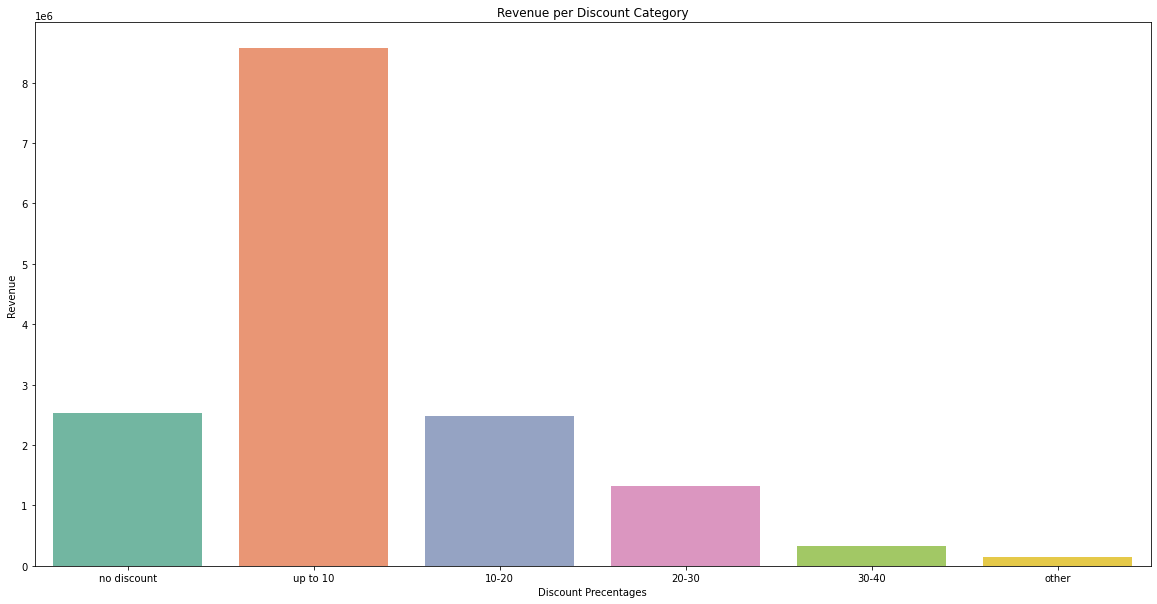

In [ ]:
#cats = ['no discount', 'up to 10%', '10-20%', '20-30%', '30-40%', 'other']
cats = ['no discount', 'up to 10', '10-20', '20-30', '30-40', 'other']
plt.subplots(figsize=(20, 10))

sns.barplot(data=ol_products_bar, x='discount_category', y='total_price', palette='Set2', order=cats)

plt.xlabel('Discount Precentages')
plt.ylabel('Revenue')
plt.title('Revenue per Discount Category')
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Cheap vs Expensive

In [ ]:
ol_products['unit_price'].describe()

count   59972.00
mean      242.89
std       507.32
min         0.01
25%        29.69
50%        69.99
75%       186.99
max      8287.80
Name: unit_price, dtype: float64

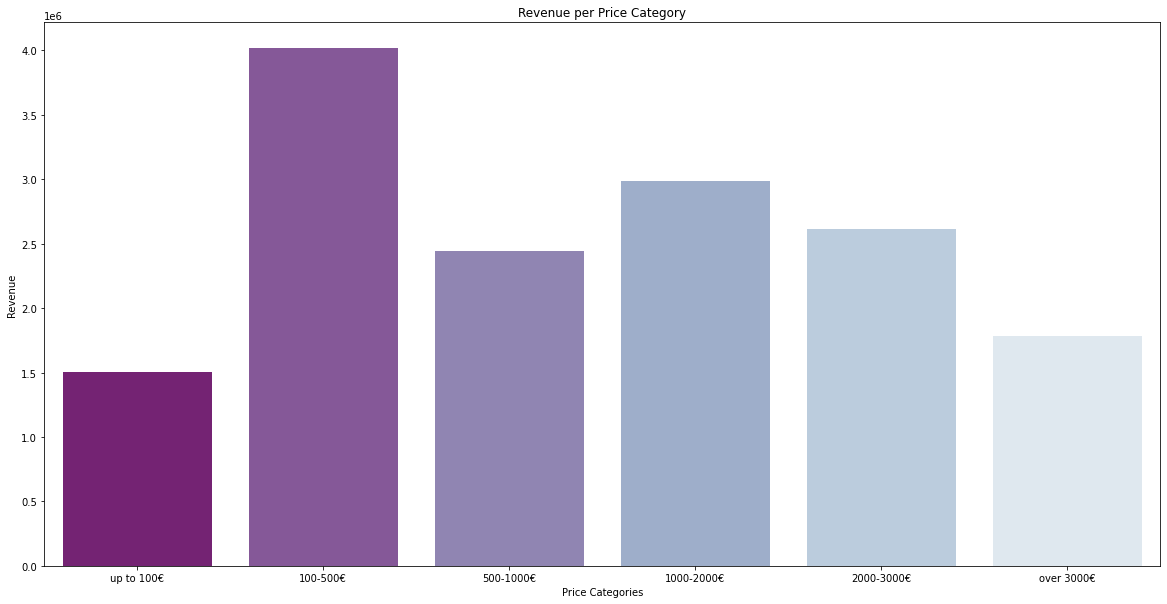

In [ ]:
def filter_price(price):

    if price < 100:
        return 'up to 100€'
    if price < 500:
        return '100-500€'
    if price < 1000:
        return '500-1000€'
    if price < 2000:
        return '1000-2000€'
    if price < 3000:
        return '2000-3000€'
    if price > 3000:
        return 'over 3000€'

price_cat = ['up to 100€', '100-500€', '500-1000€', '1000-2000€', '2000-3000€', 'over 3000€']
  
#applying the filter function to 'discount_percentage' column 
ol_products['price_category'] = ol_products['total_price'].apply(filter_price)

p =(
ol_products
      .groupby('price_category')
      .agg({'total_price' : 'sum'})
      .sort_values('total_price', ascending=False)
      .reset_index()
)
plt.subplots(figsize=(20, 10))

sns.barplot(data=p, x='price_category', y='total_price', palette='BuPu_r', order=price_cat)

plt.xlabel('Price Categories')
plt.ylabel('Revenue')
plt.title('Revenue per Price Category')
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

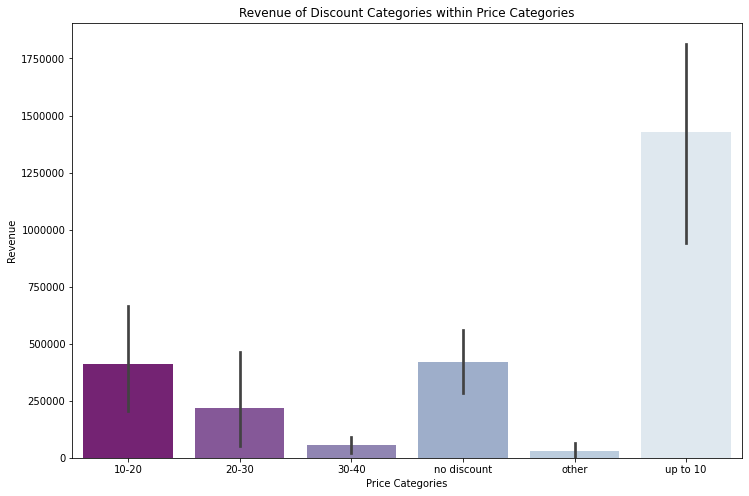

In [ ]:
# plotting discount percentages per price category

# plotting discount percentages per price category

# ol_products
# disc_price_cat = (
temp_ol_pro = (
ol_products
      .groupby(['price_category', 'discount_category'])
      .agg({'total_price' : 'sum'})
      .reset_index()
)

p_order_wide = temp_ol_pro.pivot( "price_category",'discount_category','total_price')


plt.subplots(figsize=(12, 8))
sns.barplot(data=p_order_wide, palette='BuPu_r')

plt.xlabel('Price Categories')
plt.ylabel('Revenue')
plt.title('Revenue of Discount Categories within Price Categories')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

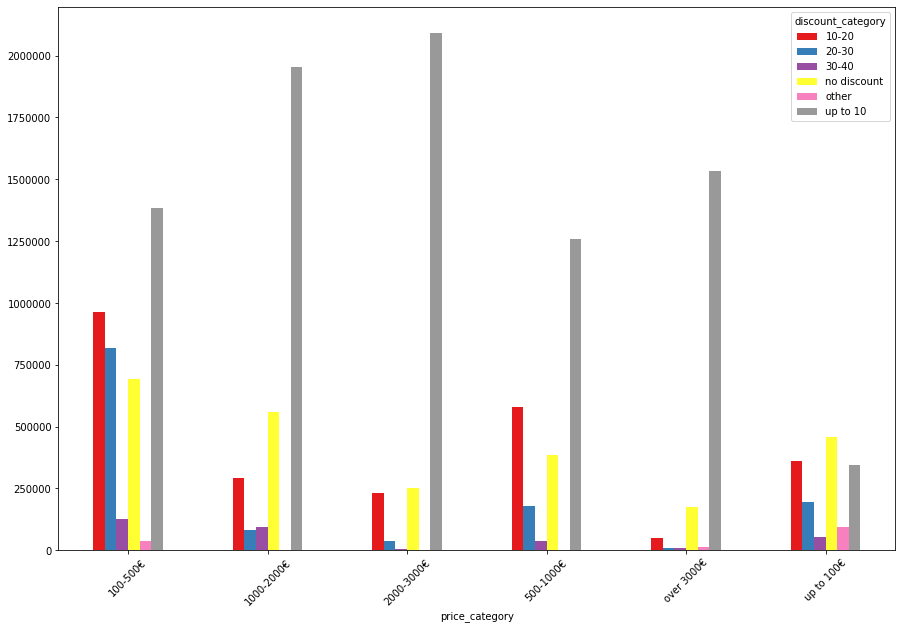

In [397]:
#tried to sort the values in the x axis, so that the graph will be generated with the values in the (up to 100, 100-500,..., over 3000)

#ax = p_order_wide.sort_values(by="price_category", ascending=True).plot.bar(figsize=(15,10), rot=0, colormap='Set1')
ax = p_order_wide.sort_values(by="price_category", ascending=True).plot.bar(figsize=(15,10), rot=0, colormap='Set1')
# plt.xlabel('Month') # x label name
# plt.ylabel('Number Of Orders') # y label name
# plt.title('evolution for the amount of orders in different states  through 2017') # title

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xticks(rotation=45)
plt.show() # show the plot

In [ ]:
p_order_wide.head()